In [35]:
# -----------------------------librerías extra

In [36]:
using ProgressMeter
using Cubature
using PyPlot

In [37]:
using Graf
using nintegrate

### Para analizar los datos del solitón ya propagado:

In [38]:
function quitar_puntos_mayores_a(A::Array{Float64,2},numero_maximo::Float64)
    Dummy=A;
    for i in 1:length(A[1,:])
        for j in 1:length(A[:,1])

            if A[i,j] < numero_maximo
             continue

                else 

                Dummy[i,j]=0.0



            end



        end

    end
    
    return Dummy
    
end

quitar_puntos_mayores_a (generic function with 1 method)

### ----------------------------constantes

### ----------------------------

In [39]:
divisor_alfa=100;
DT=1;

In [40]:
const hbarr=6.62606957e-34;
const Kb=1.3806488e-23
m=144.42e-27/2;

lambda=1.0

omegaz =150.0
omegar =lambda*omegaz;

n=10.0^20.0;
alfa=5.8e-9;
alfa=alfa/divisor_alfa;
g_alfa=4.0*π*hbarr^2*alfa/m;

omegam=(omegar^2*omegaz)^(1/3);
Npart=10.0^5.0;
mu=0.5*(15^(2/5))*hbarr*omegam*(Npart*alfa*sqrt(m*omegam/hbarr))^(2.0/5.0); #(hbarr/2) *(2*omegar+omegaz);#


c = sqrt(n*g_alfa/m);


#------------Parámetros característicos del solitón bosónico
ksi=1/sqrt(4*pi*n*alfa);
beta=0.0;
algo=11.0

z0=algo*ksi;
gama=1/(sqrt(1-beta^2));

### ----Función de onda

In [41]:

function sol(z::Float64)
1#(tanh((z-z0)/(ksi*gama)))/gama
end

function U(r::Float64,z::Float64)
    (1/2)*m*((omegar*r)^2 + (omegaz*z)^2)
end

function n_tf(r::Float64,z::Float64)            
    if  mu-U(r,z)>0 0
        return (mu-U(r,z))/(n*g_alfa)              
    end
    return 0       
end


function FUNCIONTF0(r::Float64,z::Float64)
    sqrt(n_tf(r,z))*(sol(z)+im*beta)
end

function FUNCIONTF0(v::Vector{Float64})
    FUNCIONTF0(v[1],v[2])
end

FUNCIONTF0 (generic function with 2 methods)

In [42]:
rmax_estatico=sqrt(2*mu/(m*omegar^2))
zmax_estatico=sqrt(2*mu/(m*omegaz^2))


function rmaxintegrar(t::Float64)
    rmax_estatico/sqrt(abs(sin(omegar*t)))
end

function zmaxintegrar(t::Float64)
    zmax_estatico/sqrt(abs(sin(omegaz*t)))
end



rmaxevaluar=2.5*rmax_estatico;
zmaxevaluar=2.5*zmax_estatico;


In [43]:
#unidades 0A
EOA=hbarr*omegam;
tOA=1/omegam;
lOA=sqrt(hbarr/(m*omegam));

# El tiempo

In [55]:
t1=ksi/c;
t0=tOA/DT;
t1=t1/DT;


resolucion=100; #espacial
iteracionest=10;

In [56]:
rmaxintegrar(t1)/rmax_estatico

2.1204409987775468

In [57]:
zmaxintegrar(t1)/zmax_estatico

2.1204409987775468

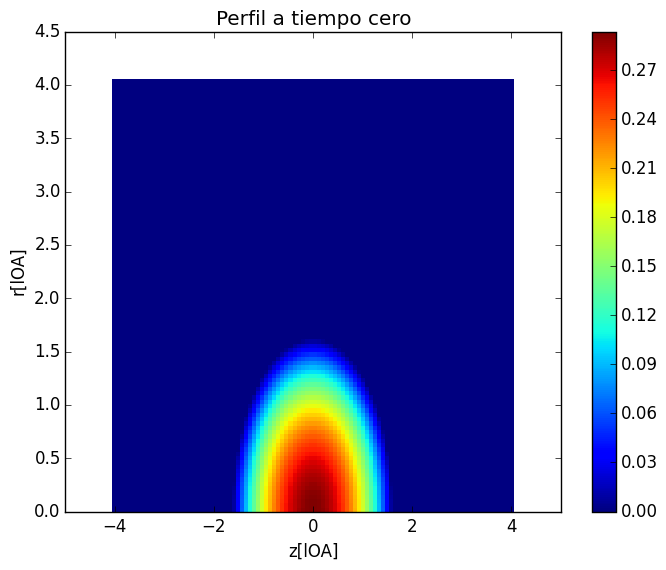

PyObject <matplotlib.colorbar.Colorbar instance at 0x7f155b7bf560>

In [54]:
Perfiles_interaccion=zeros(resolucion+1,resolucion+1,iteracionest);



function ρ0(r::Float64,z::Float64)
    FUNCIONTF0(r,z) *conj(FUNCIONTF0(r,z))
end


function Edo_base_OA(r::Float64,z::Float64)
    (m/(π*hbarr))^(3/4)*sqrt(omegar)*omegaz^(1/4)*exp(-(m*omegar/(2*hbarr))*r^2-(m*omegaz/(2*hbarr))*z^2)    
end

function Densidad_edo_base_OA(r::Float64,z::Float64)
    Edo_base_OA(r,z)^2 
end



perfilinicial=gencodominio2D([-zmaxevaluar,zmaxevaluar],[0.0,rmaxevaluar],resolucion,n_tf);
#perfilinicial_OA=gencodominio2D([-zmaxevaluar,zmaxevaluar],[0.0,rmaxevaluar],resolucion,Densidad_edo_base_OA);


grafdensidad([-zmaxevaluar/lOA,zmaxevaluar/lOA],[0.0,rmaxevaluar/lOA],resolucion+1, perfilinicial,"Perfil a tiempo cero","z[lOA]","r[lOA]","barra")
#savefig("propa5.png")
#savefig("Perfil a tiempo cero con lOA=$lOA alfa entre $divisor_alfa lambda=$lambda .png")

In [49]:
# ----------------------------------------------------------------------------------------------

In [50]:
rmax_estatico/lOA

1.6190009805595431

tiempos=linspace(tOA/100,tOA,101);
rmax=zeros(101);
zmax=zeros(101);

[rmax[i]=1/sqrt(abs(sin(omegar*tiempos[i]))) for i in 1:101]; 
[zmax[i]=1/sqrt(abs(sin(omegaz*tiempos[i]))) for i in 1:101]; 

PyPlot.plot(rmax)

PyPlot.plot(zmax)

# Inspeccionar la función a integrar

In [41]:
#########EN UNIDADES dependientes del tiempo

N_est=(m/hbarr)^(3/2)*omegar*sqrt(omegaz)/sqrt(2*π);


function sol(z::Float64,t)
    tanh((z*sqrt(abs(sin(omegaz*t)))-z0)/(ksi*gama))/gama
end

function fase_rr1(r1::Float64,r::Float64,t::Float64)
    (m*omegar/(2*hbarr))*((r1^2+r^2)*cos(omegar*t))+π/4
end

function fase_zz1(z1::Float64,z::Float64,t::Float64)
    (m*omegaz/(2*hbarr))*((z1^2+z^2)*cos(omegaz*t)-2*z*z1)
end


function Bessel0(r1::Float64,r::Float64)
    besselj0(abs(m*omegar*r*r1/hbarr))
end

function U(r::Float64,z::Float64,t::Float64)
    0.5*(m)*((omegar*r)^2*sin(omegar*t) + (omegaz*z)^2*sin(omegaz*t))
end



function n_tf(r::Float64,z::Float64,t::Float64)            
    if  mu-U(r,z,t)>0 0
        return (mu-U(r,z,t))/(n*g_alfa)              
    end
    return 0       
end


function Rre(r1::Float64,r::Float64,t::Float64)
    Bessel0(r1,r)*r1*cos(fase_rr1(r1,r,t))
end


function Rim(r1::Float64,r::Float64,t::Float64)
    Bessel0(r1,r)*r1*sin(fase_rr1(r1,r,t))
end


function Zre(z1::Float64,z::Float64,t::Float64)
    cos(fase_zz1(z1,z,t))*sol(z1,t)-beta*sin(fase_zz1(z1,z,t))
end

function Zim(z1::Float64,z::Float64,t::Float64)
    sin(fase_zz1(z1,z,t))*sol(z1,t)+beta*cos(fase_zz1(z1,z,t))
end


function R_funcion_a_integrar(r1::Float64,z1::Float64,r::Float64,z::Float64,t::Float64)
    Rre(r1,r,t)*sqrt(n_tf(r1,z1,t))*Zre(z1,z,t)-Rim(r1,r,t)*sqrt(n_tf(r1,z1,t))*Zim(z1,z,t)
end


function I_funcion_a_integrar(r1::Float64,z1::Float64,r::Float64,z::Float64,t::Float64)
    Rre(r1,r,t)*sqrt(n_tf(r1,z1,t))*Zim(z1,z,t)+Rim(r1,r,t)*sqrt(n_tf(r1,z1,t))*Zre(z1,z,t)
end


R_funcion_a_integrar(v::Vector{Float64},r,z,t)=R_funcion_a_integrar(v[1],v[2],r,z,t)

I_funcion_a_integrar(v::Vector{Float64},r,z,t)=I_funcion_a_integrar(v[1],v[2],r,z,t)


I_funcion_a_integrar (generic function with 2 methods)

In [42]:
#########EN UNIDADES dependientes del tiempo

N_est=(m/hbarr)^(3/2)*omegar*sqrt(omegaz)/sqrt(2*π);


function sol(z::Float64,t)
    1
    #tanh((z*sqrt(abs(sin(omegaz*t)))-z0)/(ksi*gama))/gama
end

function fase_rr1(r1::Float64,r::Float64,t::Float64)
    (m*omegar/(2*hbarr))*((r1^2+r^2)*cos(omegar*t))+π/4
end

function fase_zz1(z1::Float64,z::Float64,t::Float64)
    (m*omegaz/(2*hbarr))*((z1^2+z^2)*cos(omegaz*t)-2*z*z1)
end


function Bessel0(r1::Float64,r::Float64)
    besselj0(abs(m*omegar*r*r1/hbarr))
end

function U(r::Float64,z::Float64,t::Float64)
    0.5*(m)*((omegar*r)^2*sin(omegar*t) + (omegaz*z)^2*sin(omegaz*t))
end



function n_tf(r::Float64,z::Float64,t::Float64)            
    if  mu-U(r,z,t)>0 0
        return (mu-U(r,z,t))/(n*g_alfa)              
    end
    return 0       
    
    
#    ((m/(π*hbarr))^(3/2)*omegar*omegaz^(1/2)*exp(  -(m*omegar/(hbarr))*r^2*sin(omegar*t)-(m*omegaz/(hbarr))*z^2*sin(omegaz*t))  )    

    
end


function Rre(r1::Float64,r::Float64,t::Float64)
    Bessel0(r1,r)*r1*cos(fase_rr1(r1,r,t))
end


function Rim(r1::Float64,r::Float64,t::Float64)
    Bessel0(r1,r)*r1*sin(fase_rr1(r1,r,t))
end


function Zre(z1::Float64,z::Float64,t::Float64)
    cos(fase_zz1(z1,z,t))*sol(z1,t)-beta*sin(fase_zz1(z1,z,t))
end

function Zim(z1::Float64,z::Float64,t::Float64)
    sin(fase_zz1(z1,z,t))*sol(z1,t)+beta*cos(fase_zz1(z1,z,t))
end


function R_funcion_a_integrar(r1::Float64,z1::Float64,r::Float64,z::Float64,t::Float64)
    Rre(r1,r,t)*sqrt(n_tf(r1,z1,t))*Zre(z1,z,t)-Rim(r1,r,t)*sqrt(n_tf(r1,z1,t))*Zim(z1,z,t)
end


function I_funcion_a_integrar(r1::Float64,z1::Float64,r::Float64,z::Float64,t::Float64)
    Rre(r1,r,t)*sqrt(n_tf(r1,z1,t))*Zim(z1,z,t)+Rim(r1,r,t)*sqrt(n_tf(r1,z1,t))*Zre(z1,z,t)
end


R_funcion_a_integrar(v::Vector{Float64},r,z,t)=R_funcion_a_integrar(v[1],v[2],r,z,t)

I_funcion_a_integrar(v::Vector{Float64},r,z,t)=I_funcion_a_integrar(v[1],v[2],r,z,t)


I_funcion_a_integrar (generic function with 2 methods)

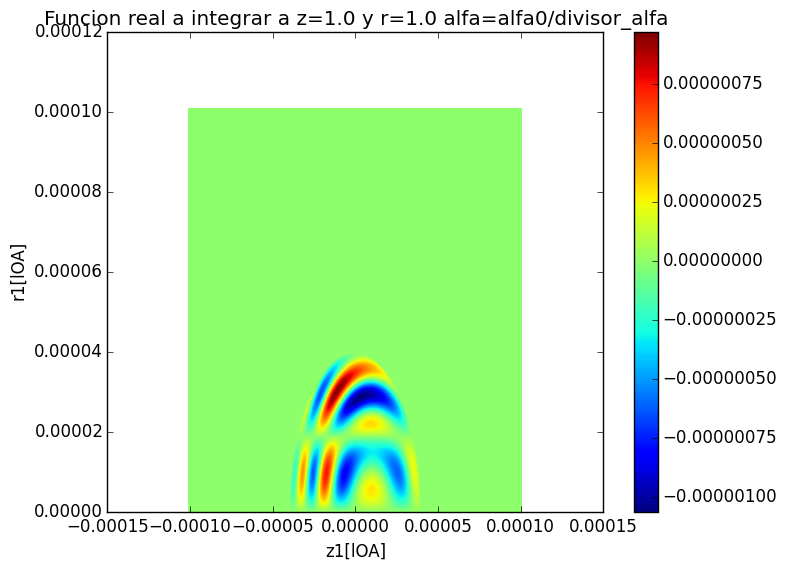

PyObject <matplotlib.colorbar.Colorbar instance at 0x7f3279e26248>

In [46]:
r=lOA;
z=lOA;
f1(v)=R_funcion_a_integrar(v,r,z,7*t0)
zf1=gencodominio2Dvec([-zmaxintegrar(t0),zmaxintegrar(t0)],[0.0,rmaxintegrar(t0)],1000,f1)
grafdensidad([-zmaxintegrar(t0),zmaxintegrar(t0)],[0.0,rmaxintegrar(t0)],1000,zf1,"Funcion real a integrar a z=$(z/lOA) y r=$(r/lOA) alfa=alfa0/divisor_alfa","z1[lOA]","r1[lOA]","barra")

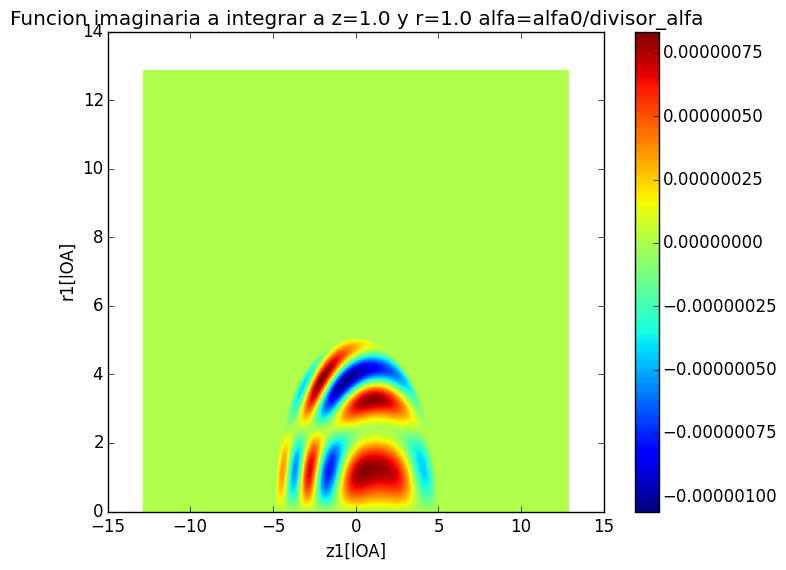

PyObject <matplotlib.colorbar.Colorbar instance at 0x7f3279cf9248>

In [47]:
r=lOA;
z=lOA;
f2(v)=I_funcion_a_integrar(v,r,z,7*t0)
zf2=gencodominio2Dvec([-zmaxintegrar(t0),zmaxintegrar(t0)],[0.0,rmaxintegrar(t0)],1000,f2)
grafdensidad([-zmaxintegrar(t0)/lOA,zmaxintegrar(t0)/lOA],[0.0,rmaxintegrar(t0)/lOA],1000,zf2,"Funcion imaginaria a integrar a z=$(z/lOA) y r=$(r/lOA) alfa=alfa0/divisor_alfa","z1[lOA]","r1[lOA]","barra")

# Graficar los datos propagados y analizarlos si es que ya salieron de "Integrales burdas 6.ipynb" 

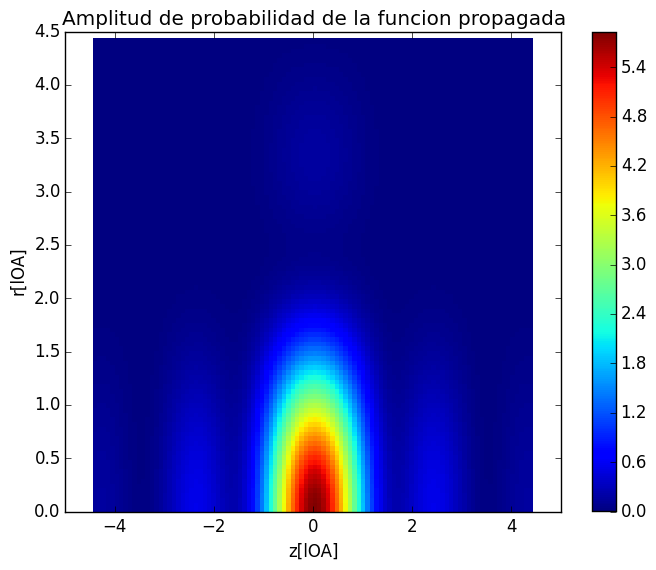

In [35]:
divisor_alfa=10;
A=readdlm("salida a 5*1  alfa entre 10  resol de 100*100 .dat", );
grafdensidad([-zmaxintegrar(t0)/lOA,zmaxintegrar(t0)/lOA],[0.0,rmaxintegrar(t0)/lOA],101,A,"Amplitud de probabilidad de la funcion propagada","z[lOA]","r[lOA]","barra")
savefig("Perfil a tiempo 5 con alfa entre $divisor_alfa lambda=$lambda .png")

In [19]:
divisor_alfa

10

In [60]:
Soliton_100=zeros(101,101,10);

for i in 1
Soliton_100[:,:,i]=readdlm("salida se soliton real a tiempos t0*$i con DT=100.dat")
end

B=Soliton_100;

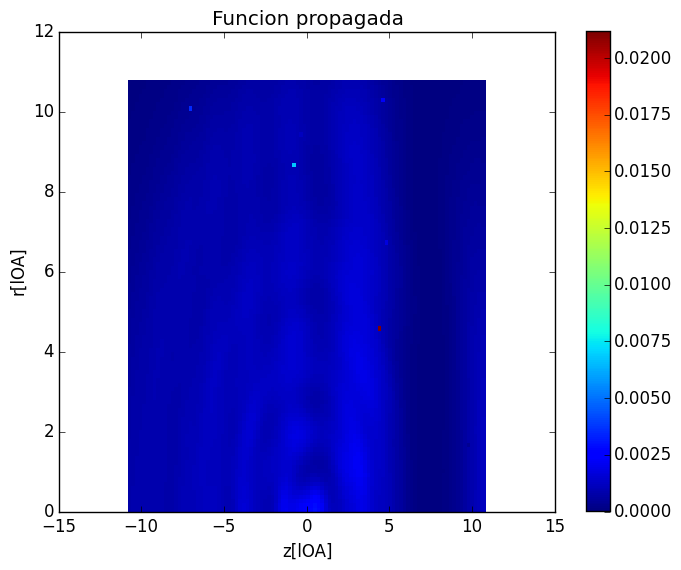

PyObject <matplotlib.colorbar.Colorbar instance at 0x7f755d614dd0>

In [61]:
grafdensidad([-zmaxintegrar(t0)/lOA,zmaxintegrar(t0)/lOA],[0.0,rmaxintegrar(t0)/lOA],101,Soliton_100[:,:,2],"Funcion propagada","z[lOA]","r[lOA]","barra")

In [68]:
B[:,:,1]=quitar_puntos_mayores_a(B[:,:,1],0.0030);

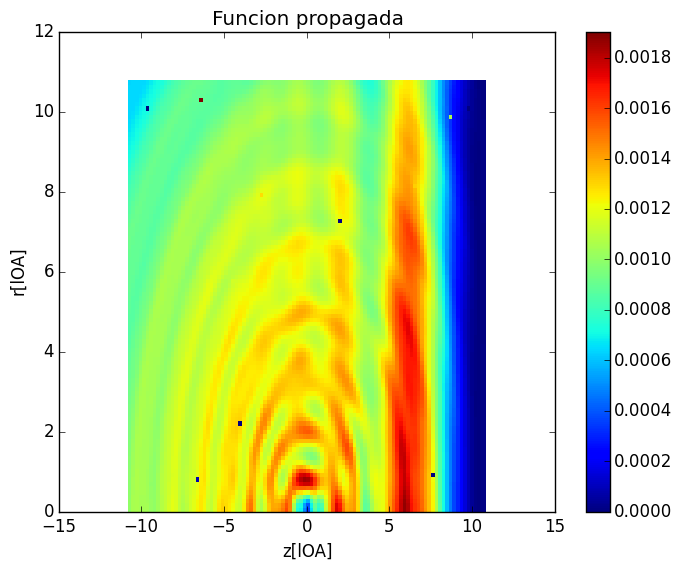

PyObject <matplotlib.colorbar.Colorbar instance at 0x7f755c704170>

In [69]:
grafdensidad([-zmaxintegrar(t0)/lOA,zmaxintegrar(t0)/lOA],[0.0,rmaxintegrar(t0)/lOA],101,B[:,:,1],"Funcion propagada","z[lOA]","r[lOA]","barra")

In [47]:
find(A)

0-element Array{Int64,1}

In [41]:
j=1
[find(A[i,j]<1.0,A) for i in 1:101]

LoadError: LoadError: MethodError: `isless` has no method matching isless(::Array{Float64,2}, ::Int64)
Closest candidates are:
  isless(!Matched::AbstractFloat, ::Real)
  isless(!Matched::Real, ::Real)
  isless(!Matched::Char, ::Integer)
while loading In[41], in expression starting on line 1

In [36]:
findmax(A)

(0.004562165845257916,8531)